# Homework 1, EDS 220
## Fun With Data Manipulation in Google Earth Engine

This template provides the instructions for EDS 220 HW1, and some initial environment loading/package configuration commands which you are welcome to modify as needed. 

**You will need to supply your own code for this assignment! Feel free to cut and paste relevant lines from the course materials or elsewhere online, that's what coding is all about.**

We'll assume that you need to load the Google Earth Engine package, and will also include several other common Python packages:
- pandas
- matplotlib (the plotting functionality "matplotlib.pyplot" to be precise)
- numpy

In [3]:
# Import packages
import ee
import geemap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Choose A Study Region

Think about places on Earth that you're interested in. This could be anywhere: Santa Barbara, your hometown, a place you always wanted to visit, you name it. 

For that place, then consider what it is like. Is it urban? Rural? Temperate? Tropical? Write a brief (1-2 paragraph) description of the local climate and population (if applicable).

I want to look at Gulu, Uganda. This place is a town in rural northern uganda that is mad eup of a larger city and surrounding parishes that have smaller villages in them. I am interested in this location as it is where my parents work to imporve the lives of the villagers who were affected by teh civil war or the current conflucit happening in South Sudan. There is a dry season and a rainy season, the dry season can be very challanging for people to grow food and then there can be flash floods during the rainy season, it is usually warm and humid during this time. Throughout teh year the temperature can very from 60F to 100F but rarely goes outside that range. I am super interested to see if there are any larger stroms I could look at over the past few years. 
The population of Gulu town was estimated to be around 200,000 people in 2020 and more people can be found in the surrounding villages. 

### 2. Locate A Precipitation Dataset

Look through the Google Earth Engine data catalog:
    https://developers.google.com/earth-engine/datasets
    
To keep things simple (ish), we'll stick with precipitation as our major climate variable. Precip is nice because there are lots of interesting spatial patterns that are easy to see without doing too much data processing! 

a. Choose one of the precipitation datasets available in GEE, any one you like. Explain briefly (1-2 paragraphs) why you chose it, and what you think its major advantages/properties might be and how they compare with other available data products.
You can also explore the metadata associated with your dataset using the `print()` and `getInfo()` methods, or viewing on the description page for your dataset. See the example ERA5 analysis code provided in this repo for more details!

I chose this data set (GPM: Global Precipitation Measurement (GPM) v6) becasue I was interested in getting rainfall data that is updated often (this is every three hours) and uses other products to make the predictions better. From the website "This algorithm is intended to intercalibrate, merge, and interpolate all satellite microwave precipitation estimates, together with microwave-calibrated infrared (IR) satellite estimates, precipitation gauge analyses, and potentially other precipitation estimators at fine time and space scales for the TRMM and GPM eras over the entire globe." I feel like this will give a very good estimate of what is actually going on, espically in areas where an average might not show the nuances of rainfall patterns in places where it will only rain for a short time, but might get a large amount of preciptiation in that short time. 

In [5]:
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AX4XfWjHdqGHIVhLTxfQx75lOS3_CqLWvLNHuaDc237KTlcom47m6slDI6Q



Successfully saved authorization token.


In [6]:
gdat = ee.ImageCollection("NASA/GPM_L3/IMERG_V06").filter(ee.Filter.date('2020-07-01', '2021-09-01'));

testimg=gdat.first()
bands=testimg.bandNames()
str(bands.getInfo())

"['HQobservationTime', 'HQprecipSource', 'HQprecipitation', 'IRkalmanFilterWeight', 'IRprecipitation', 'precipitationCal', 'precipitationUncal', 'probabilityLiquidPrecipitation', 'randomError']"

### 3. Plot a Time Series of Precipitation

Let's do a new type of analysis on the data: the creation of a time series. The "ExampleCommands_HW1" notebook should give you a starting point for how to do this - pull out data for your region of interest, and plot a time series.



In [81]:
gulu_lon = 32.29899
gulu_lat = 2.77457
gulu_poi = ee.Geometry.Point(gulu_lon, gulu_lat)
scale = 100

In [82]:
pr=gdat.select('IRprecipitation')
gulu_pr_ts = pr.getRegion(gulu_poi, scale).getInfo()

In [83]:
df = pd.DataFrame(gulu_pr_ts)

print(df)

                    0          1         2              3                4
0                  id  longitude  latitude           time  IRprecipitation
1      20200701000000  32.299375  2.774447  1593561600000           0.4676
2      20200701003000  32.299375  2.774447  1593563400000           1.5552
3      20200701010000  32.299375  2.774447  1593565200000            0.942
4      20200701013000  32.299375  2.774447  1593567000000            0.098
...               ...        ...       ...            ...              ...
20490  20210831213000  32.299375  2.774447  1630445400000           2.8452
20491  20210831220000  32.299375  2.774447  1630447200000           3.7728
20492  20210831223000  32.299375  2.774447  1630449000000           3.5332
20493  20210831230000  32.299375  2.774447  1630450800000           4.1268
20494  20210831233000  32.299375  2.774447  1630452600000           2.8776

[20495 rows x 5 columns]


In [84]:
headers=df.loc[0]     
print(headers)

df2 = pd.DataFrame(df.values[1:], columns=headers)     
print(df2)

0                 id
1          longitude
2           latitude
3               time
4    IRprecipitation
Name: 0, dtype: object
0                  id  longitude  latitude           time IRprecipitation
0      20200701000000  32.299375  2.774447  1593561600000          0.4676
1      20200701003000  32.299375  2.774447  1593563400000          1.5552
2      20200701010000  32.299375  2.774447  1593565200000           0.942
3      20200701013000  32.299375  2.774447  1593567000000           0.098
4      20200701020000  32.299375  2.774447  1593568800000               0
...               ...        ...       ...            ...             ...
20489  20210831213000  32.299375  2.774447  1630445400000          2.8452
20490  20210831220000  32.299375  2.774447  1630447200000          3.7728
20491  20210831223000  32.299375  2.774447  1630449000000          3.5332
20492  20210831230000  32.299375  2.774447  1630450800000          4.1268
20493  20210831233000  32.299375  2.774447  1630452600000 

In [85]:
df2['datetime'] = pd.to_datetime(df2['time'], unit='ms')
df2 #sanity check

,id,longitude,latitude,time,IRprecipitation,datetime
0,20200701000000,32.299375,2.774447,1593561600000,0.4676,2020-07-01 00:00:00
1,20200701003000,32.299375,2.774447,1593563400000,1.5552,2020-07-01 00:30:00
2,20200701010000,32.299375,2.774447,1593565200000,0.942,2020-07-01 01:00:00
3,20200701013000,32.299375,2.774447,1593567000000,0.098,2020-07-01 01:30:00
4,20200701020000,32.299375,2.774447,1593568800000,0,2020-07-01 02:00:00
...,...,...,...,...,...,...
20489,20210831213000,32.299375,2.774447,1630445400000,2.8452,2021-08-31 21:30:00
20490,20210831220000,32.299375,2.774447,1630447200000,3.7728,2021-08-31 22:00:00
20491,20210831223000,32.299375,2.774447,1630449000000,3.5332,2021-08-31 22:30:00
20492,20210831230000,32.299375,2.774447,1630450800000,4.1268,2021-08-31 23:00:00


(0.0, 37.0)

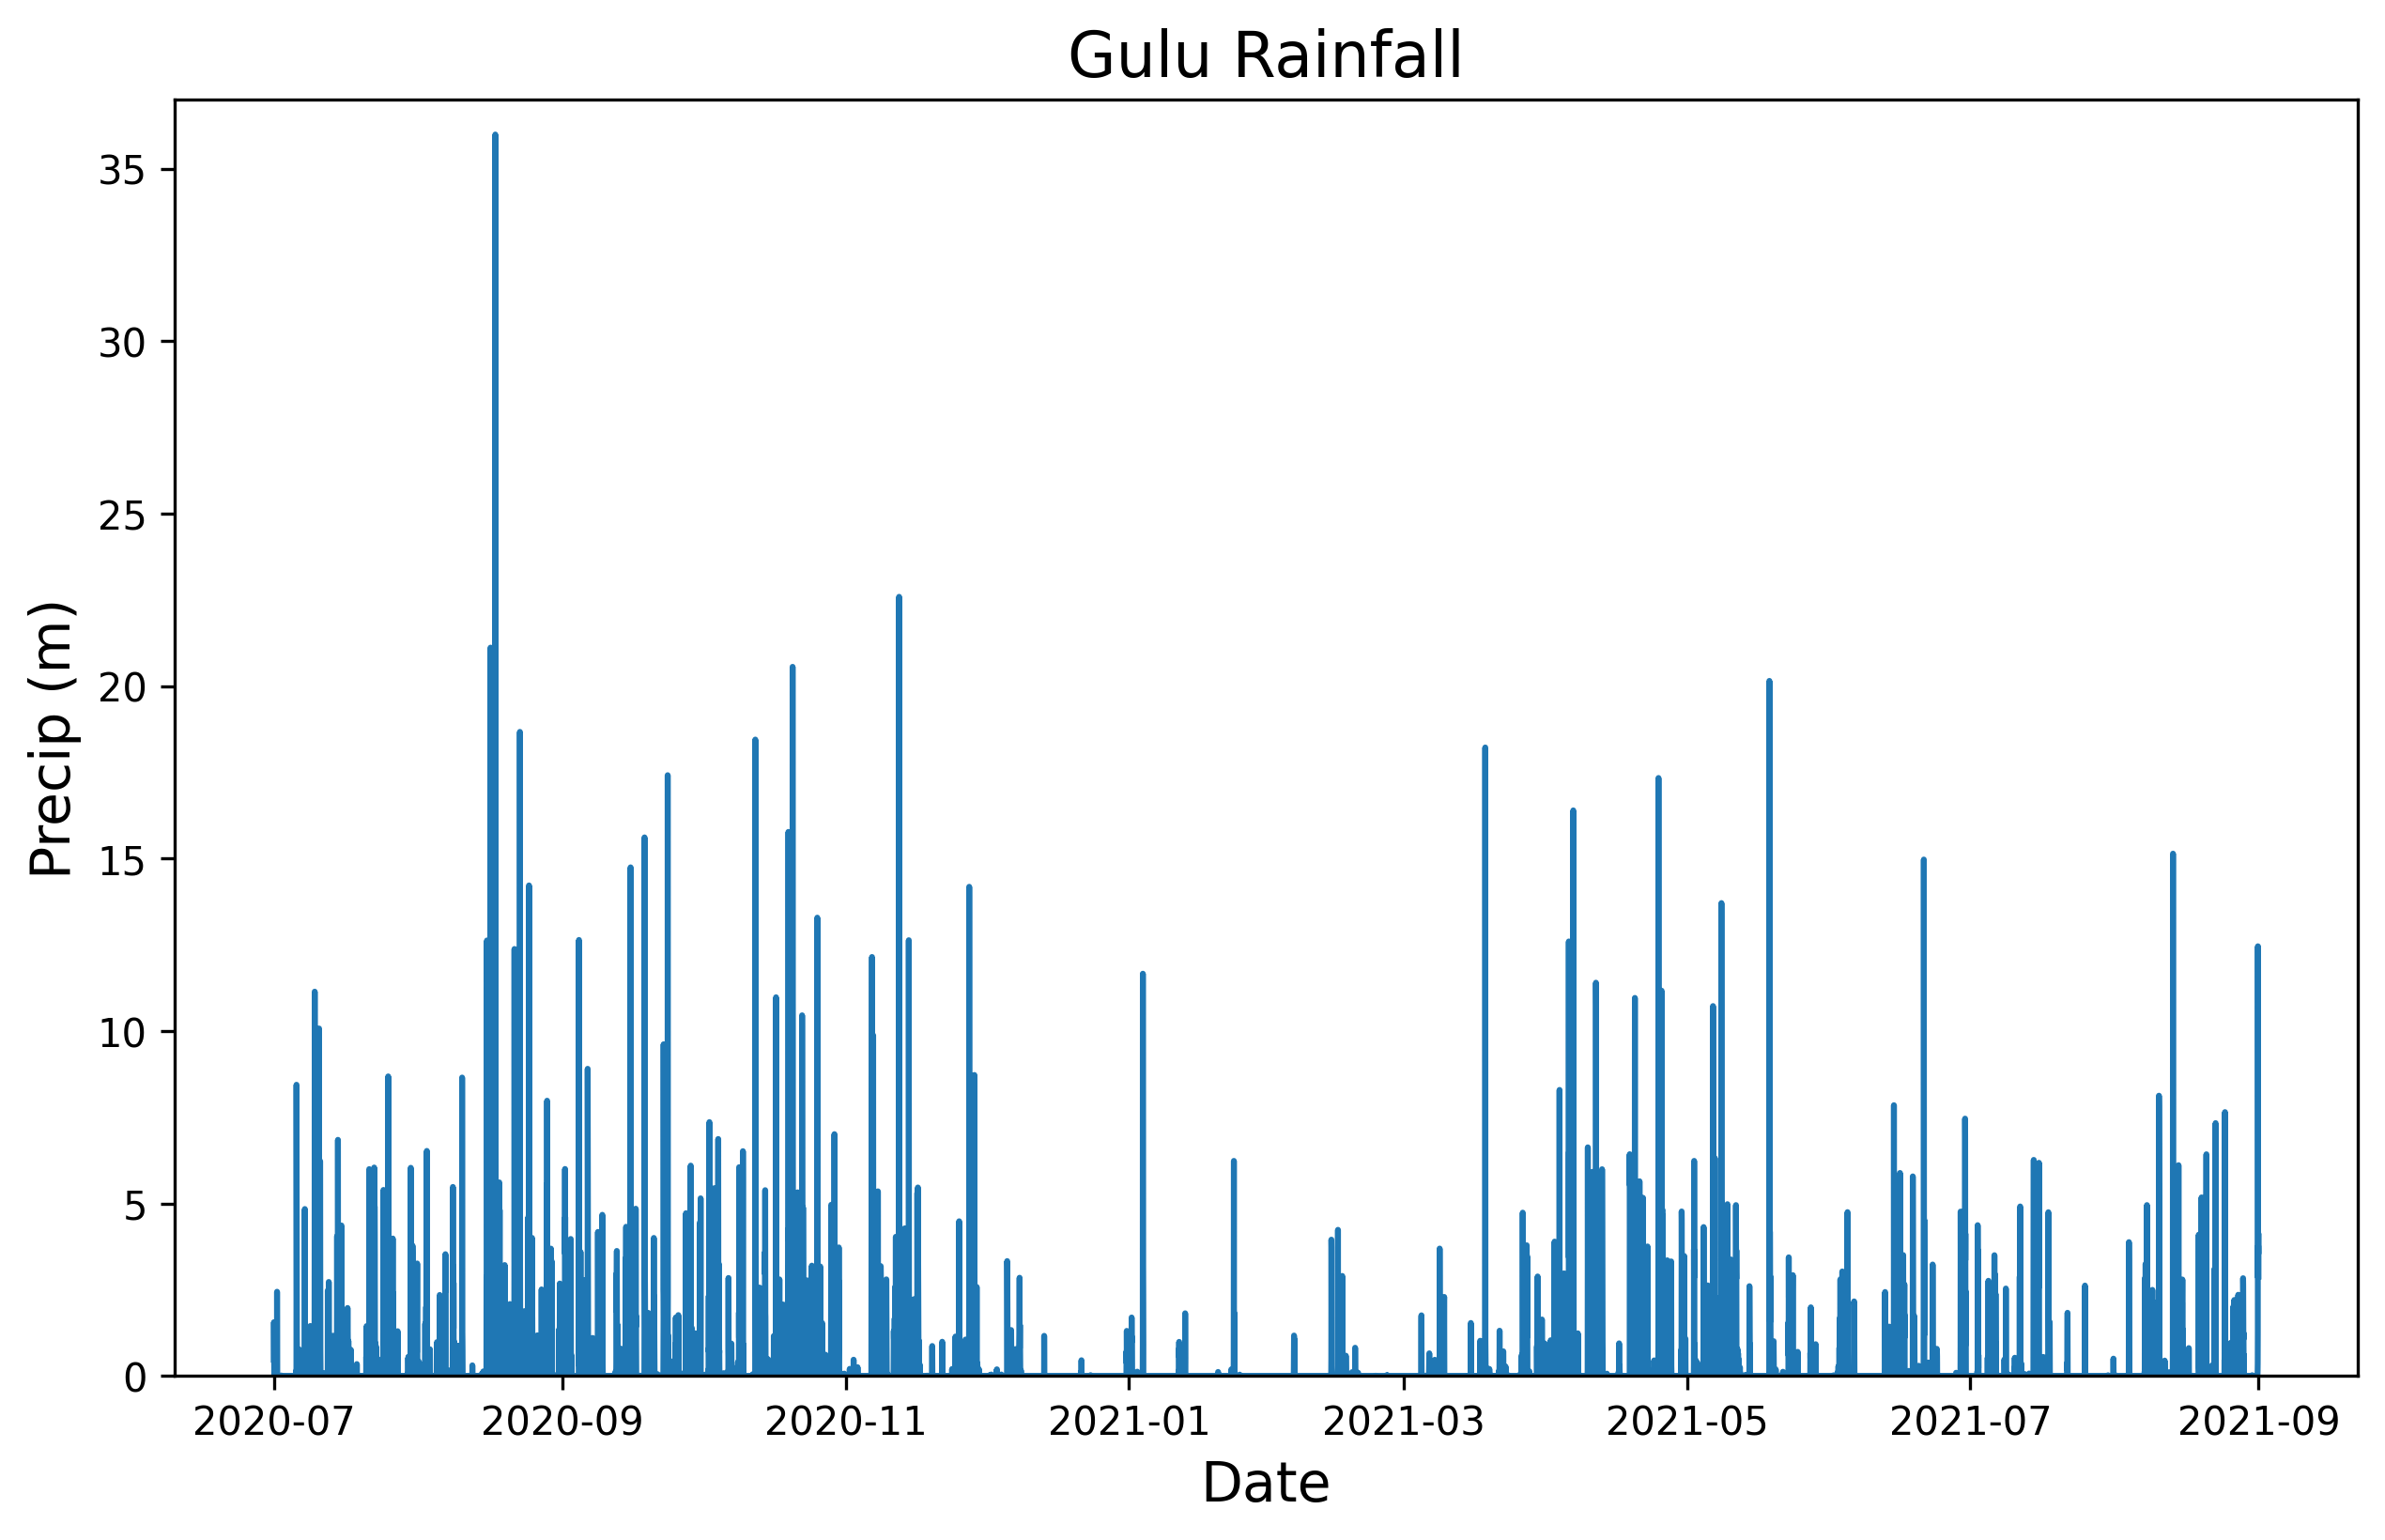

In [86]:
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(df2['datetime'],df2['IRprecipitation'])   # add data to the plot
plt.title('Gulu Rainfall', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip (m)', fontsize=14)
plt.ylim(0, 37)

### 4. Make Some Maps of Interesting Times

Based on the time series of precipitation you just created, look for a few interesting time periods. This could be days when extreme storms happened, or seasons (or years) that were above or below average precipitation.

a. Explain briefly why you chose these particular time periods.

b. Using the GEE Map method that we worked on in class, plot maps of those time periods. Things to think about:
- choosing an appropriate zoom level to highlight the precipitation features you're interested in
- setting appropriate min/max ranges for your plot, to allow the major features of regional precipitation to be easily visualized

c. Describe briefly what is interesting about your maps! 

A. I chose to do the day before, during, and after the largest recorded rainfall for the time period. I wanted to see what the difference would look like in the satilite imagery as the storm passes.  I am assuming that there will be a difference, as the rainfall for the day was such a large spike. 

In [25]:
ptGulu = ee.Geometry.Point([2.7, 32], zoom = 7)
gdat_filt = gdat.filterBounds(ptGulu)

pr = gdat_filt.select('IRprecipitation')
prdfltB = pr.filter(ee.Filter.date('2020-08-10', '2020-08-11')).mean();
prdfltD = pr.filter(ee.Filter.date('2020-08-16', '2020-08-18')).mean();
prdfltA = pr.filter(ee.Filter.date('2020-08-23', '2020-08-27')).mean();


In [26]:
VIS_PREC = {
    'min':1,
    'max':37,
    'palette': ['000096','0064ff', '00b4ff', '33db80', '9beb4a',
  'ffeb00', 'ffb300', 'ff6400', 'eb1e00', 'af0000']
}

In [27]:
MapGuluB = geemap.Map(center=[2.7,32], zoom=9)
MapGuluB.addLayer(prdfltB, VIS_PREC,'IRprecipitation',opacity = .7)
MapGuluB

Map(center=[2.7, 32], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(To…

In [28]:
MapGuluD = geemap.Map(center=[2.7,32], zoom=9)
MapGuluD.addLayer(prdfltD, VIS_PREC,'IRprecipitation',opacity = .7)
MapGuluD

Map(center=[2.7, 32], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(To…

In [29]:
MapGuluA = geemap.Map(center=[2.7,32], zoom=9)
MapGuluA.addLayer(prdfltA, VIS_PREC,'IRprecipitation',opacity = .7)
MapGuluA

Map(center=[2.7, 32], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(To…

C. I think the fact that the maps dont look that different is quite interesting. There are some smaller spikes around the day of the largest rainfall that could be accounting for this. However what I really think is going on is that becasue this is an average of the entire day, every three hours, I think that it might be giving us a value that is more subdued. Usually what will happen in this region is there will be a large storm that only lasts for a few short hours, and the way this is set up wont take that into account, as it takes the average over the entire day. I would be interested to work on this more and see how I could change my code to factor that in. 

### 5. Plot Landsat NDVI for the Region

The precipitation analysis discussed above provides useful context for identifying interesting weather events for a particular region. Now let's see what (if any!) effect changes in weather patterns have had on the landscape, using Landsat imagery. 

a. Make a long-term average NDVI map for your region: say, a 10- or 20-year mean. This will give you a baseline to compare against.

b. Make an NDVI map centered on one of your 'interesting' time periods from the precipitation time series. How are the patterns different from the long-term average? And how do you think this relates to precipitation during this time period?


A. Making our base line map

In [30]:
lsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterDate('2014-08-01', '2021-09-01');

In [31]:
place = ee.Geometry.Point([32.5825, 2.77]) #setting the place we want

In [32]:
lsat_filt = lsat.filterBounds(place) #filtering for that place

In [33]:
visParams = {'bands': ['B4', 'B3', 'B2'],
             'min': 0,
             'max': 0.3
            } #getting the visable bands

In [34]:
MapGuluCover = geemap.Map(center=[2.77, 32.5825], zoom=8)
MapGuluCover.addLayer(lsat_filt, visParams)

In [35]:
lsat_leastcloudy = lsat_filt.sort('CLOUD_COVER').first()

MapGuluCover.addLayer(lsat_leastcloudy, visParams)

In [36]:
red = lsat_leastcloudy.select('B4')
nir = lsat_leastcloudy.select('B5')

ndvi=(nir.subtract(red)).divide((nir.add(red))).rename('NDVI')

In [37]:
ndviParams = {'min': -1, 
              'max': 1, 
              'palette': ['blue', 'white', 'green']
             }

MapGuluCover.addLayer(ndvi, ndviParams,'NDVI')
MapGuluCover

Map(center=[2.77, 32.5825], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

In [273]:
def addNDVI(image):
    red = image.select('B4')
    nir = image.select('B5')
    
    ndvi = (nir.subtract(red)).divide((nir.add(red))).rename('NDVI')
    
    return image.addBands(ndvi)

In [276]:
lsat_withndvi = lsat_filt.map(addNDVI)

In [278]:
dat_drght = lsat_withndvi.filter(ee.Filter.date('2014-08-01', '2021-09-01')).mean();


In [279]:
ndviParams = {'bands': 'NDVI',
              'min': -1, 
              'max': 1, 
              'palette': ['blue', 'white', 'green']
             }

In [280]:
MapMean = geemap.Map(center=[2.77, 32.5825], zoom=8)

MapMean

Map(center=[2.77, 32.5825], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

In [281]:
MapMean.addLayer(dat_drght,ndviParams)

B. Map of intersting rainfall pattern 

In [38]:
lsat2 = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterDate('2014-08-01', '2021-09-01');

In [39]:
place = ee.Geometry.Point([32.5825, 2.77])

In [40]:
lsat2_filt = lsat2.filterBounds(place) #filtering for that place

In [41]:
MapGuluRain = geemap.Map(center=[2.77, 32.5825], zoom=8)
MapGuluRain.addLayer(lsat2_filt, visParams)

In [42]:
lsat2_leastcloudy = lsat2_filt.sort('CLOUD_COVER').first()

MapGuluRain.addLayer(lsat2_leastcloudy, visParams)

In [43]:
red = lsat2_leastcloudy.select('B4')
nir = lsat2_leastcloudy.select('B5')

ndvi=(nir.subtract(red)).divide((nir.add(red))).rename('NDVI')

In [45]:
ndviParams = {'min': -1, 
              'max': 1, 
              'palette': ['blue', 'white', 'green']
             }

MapGuluRain.addLayer(ndvi, ndviParams,'NDVI')
MapGuluRain

Map(center=[2.77, 32.5825], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

It seems like there are more clouds on the second map, and that the other layers are more red, and drier on the long term average map. 